Import Libraries

In [173]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from math import sqrt
import numpy as np
from tabulate import tabulate

Functions

In [110]:
## functions

# split the dataset into 2: training dataset and testing dataset according to the given percentage for training
def split_data(dataset, traning_percentage: int):
    traning_dataset_length = int((len(dataset) * traning_percentage) / 100)
    training_dataset = random.sample(dataset, traning_dataset_length)
    testing_dataset = [x for x in dataset if x not in training_dataset]

    return training_dataset, testing_dataset

# create two lists of x and y coordinates from a dataset with a list of (x,y) tuples
def create_xyLists(xyDataset):
    xList = []
    yList = []
    
    for (x,y) in xyDataset:
        xList.append(x)
        yList.append(y)

    return(xList, yList)

### linear regression functions
## using RSS in OLS

# ############################################################################ #
#         Σ(xi - x_mean)(yi - y_mean)                                          #
# beta1 = ---------------------------                                          #
#             Σ(xi - x_mean)^2                                                 #
# ############################################################################ #

# to find beta 1 
def find_beta1(dataset_x, dataset_y):

    x_mean = find_mean(dataset_x)
    y_mean = find_mean(dataset_y)  
    num = 0   
    den = 0
    
    for (x,y) in zip(dataset_x, dataset_y):
        num += (x - x_mean) * (y - y_mean)
        den += (x - x_mean)**2

    return num/den

# ############################################################################ #
# beta0 = = y_mean - (Beta1 * x_mean)                                          #
# ############################################################################ #

# to find beta 0
def find_beta0(dataset_x, dataset_y):

    x_mean = find_mean(dataset_x)
    y_mean = find_mean(dataset_y)   

    return y_mean - (find_beta1(dataset_x, dataset_y) * x_mean)

# to find mean of a one-dimensional array/list
def find_mean(dataset_1d):

    sum = 0

    for point in dataset_1d:
        sum += point

    return sum/len(dataset_1d)

## using gradient descent

# ############################################################################ #
# MSE = (1/n) * Σ(yi - ŷi)^2                                                   #
# ############################################################################ #

# ############################################################################ #
# d(MSE)/d(beta0) = -2/n * Σ[yi - beta0 - (beta1 * xi)]                        #
# ############################################################################ #

# ############################################################################ #
# d(MSE)/d(beta1) = -2/n * Σ[{yi - beta0 - (beta1 * xi)} * {xi}]               #
# ############################################################################ #

# to calculate the mean squared error
def CalMSE(beta0: float, beta1: float, dataset_x, dataset_y):
    sum = 0

    for (x,y) in zip(dataset_x, dataset_y):
        sum += (y - beta0 - (beta1 * x)) ** 2

    return (1/len(dataset_x)) * sum

# to find the partial derivative of beta 0
def findDerivativeOfBeta0(dataset_x, dataset_y, beta0, beta1):
    sum = 0

    for (x,y) in zip(dataset_x, dataset_y):
        sum += y - beta0 - (beta1 * x)

    return (-2/len(dataset_x)) * sum

# to find the partial derivative of beta 1
def findDerivativeOfBeta1(dataset_x, dataset_y, beta0, beta1):
    sum = 0

    for (x,y) in zip(dataset_x, dataset_y):
        sum += (y - beta0 - (beta1 * x)) * x

    return (-2/len(dataset_x)) * sum

# to find the new value of beta 0
def findNewBeta0(dataset_x, dataset_y, beta0: float = 0, beta1: float = 1, alphaOfBeta0: float = 0.001):
    return beta0 - (findDerivativeOfBeta0(dataset_x, dataset_y, beta0, beta1) * alphaOfBeta0)

# to find the new value of beta 1
def findNewBeta1(dataset_x, dataset_y, beta0: float = 0, beta1: float = 1, alphaOfBeta1: float = 0.001):
    return beta1 - (findDerivativeOfBeta1(dataset_x, dataset_y, beta0, beta1) * alphaOfBeta1)

# to find a list of y_hat values, using gradient descent, for every value of x
def findYcoordinatesFromGradientDescent(dataset_x, dataset_y, beta0, beta1, alphaOfBeta0: float, alphaOfBeta1: float, maxIter: int = 300):
    
    y_hat_list_GD = []

    counter = 0
    beta0 = 0
    beta1 = 1
    threshold = 1

    error = CalMSE(beta0, beta1, dataset_x, dataset_y)

    while error > threshold:
       beta0 = findNewBeta0(dataset_x, dataset_y, beta0, beta1, alphaOfBeta0)
       beta1 = findNewBeta1(dataset_x, dataset_y, beta0, beta1, alphaOfBeta1)
       error = CalMSE(beta0, beta1, dataset_x, dataset_y)
       counter += 1

       if (error < threshold or counter > maxIter):
            break
       
    for x in dataset_x:
        y_hat_list_GD.append(beta0 + (beta1 * x))
    
    constant = beta0
    slope = beta1
    print("In Gradient Descent:-")
    print("1. The mean squared error is: " + str(error))
    print("2. The final value of beta 0 is: " + str(beta0))
    print("3. The final value of beta 1 is: " + str(beta1))

    return y_hat_list_GD, constant, slope

# calculate the t-value for every region
def calT_value(y_hat: list, y: list, x: list, beta1):
    # Calculate residuals
    residuals = np.array(y_hat) - np.array(y)

    # Calculate sum of squared residuals
    sum_squared_residuals = np.sum(residuals**2)

    # Calculate mean of x
    mean_x = np.mean(x)

    # Calculate sum of squared x
    sum_squared_x = np.sum((np.array(x) - mean_x)**2)

    # Calculate standard error of beta1
    n = len(x)
    SE_beta1 = np.sqrt(sum_squared_residuals / ((n - 2) * sum_squared_x))

    # Calculate t-value
    t_value = beta1 / SE_beta1
    return t_value

Import files

In [111]:
# define file paths
GDP_file_path = 'GDP_Country_Wise.xlsx'
precipitation_file_path = 'Precipitation_Country_Wise.xlsx'
region_wise_country_path = 'world-regions-according-to-the-world-bank.xlsx'

# import 'GDP' and 'precipitaiton' excel files
GDP_df = pd.read_excel(GDP_file_path)
precipitation_df = pd.read_excel(precipitation_file_path)
region_wise_country_df = pd.read_excel(region_wise_country_path)

region_wise_country_df.tail(10)

,Entity,Code,Year,World Region according to the World Bank
207,United States,USA,2017,North America
208,United States Virgin Islands,VIR,2017,Latin America and Caribbean
209,Uruguay,URY,2017,Latin America and Caribbean
210,Uzbekistan,UZB,2017,Europe and Central Asia
211,Vanuatu,VUT,2017,East Asia and Pacific
212,Venezuela,VEN,2017,Latin America and Caribbean
213,Vietnam,VNM,2017,East Asia and Pacific
214,Yemen,YEM,2017,Middle East and North Africa
215,Zambia,ZMB,2017,Sub-Saharan Africa
216,Zimbabwe,ZWE,2017,Sub-Saharan Africa


Clean files

In [112]:
# clean 'GDP_df'
# create a new column 'GDP' that would convert '2020 [YR2020]' to numeric data type and handle non-numeric values
GDP_df['GDP'] = pd.to_numeric(GDP_df['2020 [YR2020]'], errors='coerce')

# find rows with non-numeric values
non_numeric_rows = GDP_df[GDP_df['GDP'].isna()]
# print(non_numeric_rows)

# round the 'GDP' column to 2 decimal places
GDP_df['GDP'] = GDP_df['GDP'].round(2)

# drop '2020 [YR2020]' column
GDP_df.drop(columns=['2020 [YR2020]', 'Series Name', 'Series Code'], inplace=True)

# drop rows below index 217 as they are redundant
GDP_df.drop(GDP_df.index[217:], inplace=True)

GDP_df.head(5)

,Country Name,Country Code,GDP
0,Afghanistan,AFG,1968.34
1,Albania,ALB,13278.37
2,Algeria,DZA,10844.77
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN


In [113]:
# clean 'precipitation_df'
# create a new column 'precipitation' that would convert '2020 [YR2020]' to numeric data type and handle non-numeric values
precipitation_df['Precipitation'] = pd.to_numeric(precipitation_df['2020 [YR2020]'], errors='coerce')

# find rows with non-numeric values
non_numeric_rows = precipitation_df[precipitation_df['Precipitation'].isna()]
# print(non_numeric_rows)

# drop '2020 [YR2020]' column
precipitation_df.drop(columns=['2020 [YR2020]', 'Series Name', 'Series Code'], inplace=True)

# drop rows below index 217 as they are redundant
precipitation_df.drop(precipitation_df.index[217:], inplace=True)

precipitation_df.head(5)

,Country Name,Country Code,Precipitation
0,Afghanistan,AFG,327.0
1,Albania,ALB,1485.0
2,Algeria,DZA,89.0
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN


In [114]:
# clean 'region_wise_country_df'
# drop 'Year' column
region_wise_country_df.drop(columns=['Year'], inplace=True)

# rename columns
region_wise_country_df.rename(columns={'Entity': 'Country'}, inplace=True)
region_wise_country_df.rename(columns={'Code': 'Country Code'}, inplace=True)
region_wise_country_df.rename(columns={'World Region according to the World Bank': 'Region'}, inplace=True)

region_wise_country_df.head(5)


,Country,Country Code,Region
0,Afghanistan,AFG,South Asia
1,Albania,ALB,Europe and Central Asia
2,Algeria,DZA,Middle East and North Africa
3,American Samoa,ASM,East Asia and Pacific
4,Andorra,AND,Europe and Central Asia


In [115]:
# merge all dataframes
merged_df = pd.merge(GDP_df, precipitation_df, on='Country Code', how='outer')
merged_df = pd.merge(merged_df, region_wise_country_df, on='Country Code', how='outer')

# # view the complete DataFrame
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# drop 'Country Name_y' column
merged_df.drop(columns=['Country Name_y', 'Country Name_x'], inplace=True)

# drop rows with NaN values
merged_df = merged_df.dropna()

# export merged file in csv
merged_df.to_csv('precipitationGDP_mergedFile.csv', index=False)

South Asia Region

In [116]:
# Region == 'South Asia'
southAsia_df = merged_df[merged_df['Region'] == 'South Asia']
southAsia_df


,Country Code,GDP,Precipitation,Country,Region
0,AFG,1968.34,327.0,Afghanistan,South Asia
15,BGD,5591.37,2666.0,Bangladesh,South Asia
22,BTN,10547.05,2200.0,Bhutan,South Asia
89,IND,6172.04,1083.0,India,South Asia
121,MDV,13419.33,1972.0,Maldives,South Asia
138,NPL,3761.80,1500.0,Nepal,South Asia
149,PAK,5004.35,494.0,Pakistan,South Asia
180,LKA,12939.44,1712.0,Sri Lanka,South Asia


In [117]:
# create dataset with x and y coordinates for the South Aisa region
southAsia_xyDataset = list(zip(southAsia_df['GDP'], southAsia_df['Precipitation']))

# split the dataset into training and testing datasets
southAsiaTraining_Dataset, southAsiaTesting_Dataset = split_data(southAsia_xyDataset, 80)
print(southAsiaTraining_Dataset)
print(southAsiaTesting_Dataset)

[(6172.04, 1083.0), (12939.44, 1712.0), (5004.35, 494.0), (13419.33, 1972.0), (10547.05, 2200.0), (5591.37, 2666.0)]
[(1968.34, 327.0), (3761.8, 1500.0)]


Training Dataset - South Asia

In [118]:
# create two lists of x and y coordinates from training dataset for the South Asia region
# original lists
southAsiaTraining_xList, southAsiaTraining_yList = create_xyLists(southAsiaTraining_Dataset)

print(southAsiaTraining_xList)
print(southAsiaTraining_yList)

[6172.04, 12939.44, 5004.35, 13419.33, 10547.05, 5591.37]
[1083.0, 1712.0, 494.0, 1972.0, 2200.0, 2666.0]


In [119]:
## using OLS to validate the best fitted line 

# y_hat = beta0 + (beta1 * x)
southAsiaTraining_yhatList_OLS = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in list(zip(southAsiaTraining_xList, southAsiaTraining_yList)):
    southAsiaTraining_yhatList_OLS.append(find_beta0(southAsiaTraining_xList, southAsiaTraining_yList) + (find_beta1(southAsiaTraining_xList, southAsiaTraining_yList) * x))

print(southAsiaTraining_xList)
print(southAsiaTraining_yhatList_OLS)

[6172.04, 12939.44, 5004.35, 13419.33, 10547.05, 5591.37]
[1486.873020003749, 1977.2105136526839, 1402.2670874507853, 2011.9813355085203, 1803.8679424391048, 1444.800100945155]


In [120]:
## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.16
alphaOfBeta1 = 0.000000009
maxIter = 300

# find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
southAsiaTraining_yhatList_GD, southAsiaTrainingConstant, southAsiaTrainingSlope = findYcoordinatesFromGradientDescent(southAsiaTraining_xList, southAsiaTraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
print(southAsiaTraining_xList)
print(southAsiaTraining_yhatList_GD)
print(f"training constant {southAsiaTrainingConstant}")
print(f"training slope: {southAsiaTrainingSlope}")

In Gradient Descent:-
1. The mean squared error is: 451374.5737757064
2. The final value of beta 0 is: 1039.6716989065314
3. The final value of beta 1 is: 0.0724559234491282
[6172.04, 12939.44, 5004.35, 13419.33, 10547.05, 5591.37]
[1486.8725566714886, 1977.2107730211187, 1402.2664994191762, 2011.981646125121, 1803.867946320659, 1444.7995756022833]
training constant 1039.6716989065314
training slope: 0.0724559234491282


In [121]:
# calculating t-value
southAsiat_value = calT_value(southAsiaTraining_yhatList_GD, southAsiaTraining_yList, southAsiaTraining_xList, southAsiaTrainingSlope)

In [122]:
# append the data relating to region, coefficient, and t-value to a list
regions_coefficients_t_value = []
regions_coefficients_t_value.append(['South Asia', southAsiaTrainingSlope, southAsiat_value])

As you can see the blue line (GD) is almost superseeding the red line (OLS)


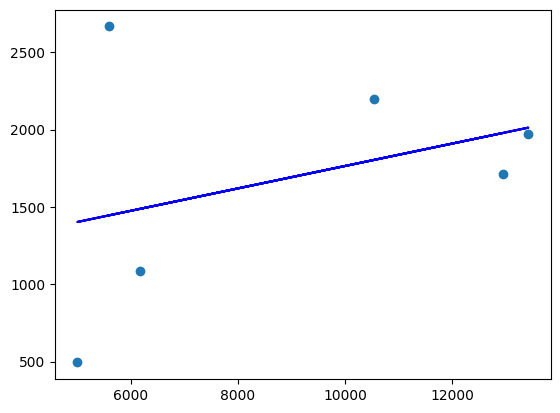

In [123]:
## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(southAsiaTraining_xList, southAsiaTraining_yList)

# obtaining the linear regression curve from OLS
plt.plot(southAsiaTraining_xList, southAsiaTraining_yhatList_OLS, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(southAsiaTraining_xList, southAsiaTraining_yhatList_GD, color = 'blue')
print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# plt.show


Testing Dataset - South Asia

According to the Gradient Descent methodology, the optimum coefficient is 0.0724559234491282. 
However, due to extremely small sample size, the coefficient is not accurate. 
Therefore, the line in testing dataset is not a good fit


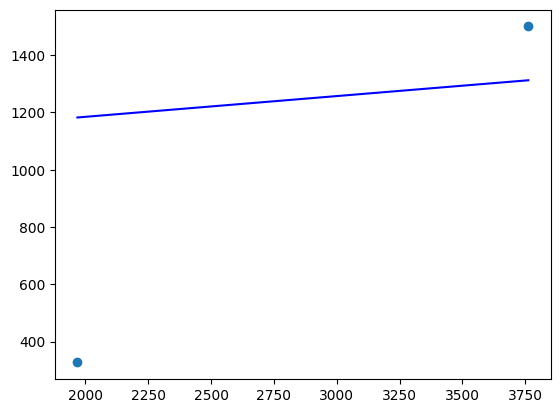

In [124]:
# create two lists of x and y coordinates from testing dataset for the South Asia region
# original lists
southAsiaTesting_xList, southAsiaTesting_yList = create_xyLists(southAsiaTesting_Dataset)

# find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
southAsiaTesting_yhatList_GD = []
for x in southAsiaTesting_xList:
    southAsiaTesting_yhatList_GD.append(southAsiaTrainingConstant + (southAsiaTrainingSlope * x))

## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(southAsiaTesting_xList, southAsiaTesting_yList)

# obtaining the linear regression curve from gradient descent
plt.plot(southAsiaTesting_xList, southAsiaTesting_yhatList_GD, color = 'blue')

print(f"According to the Gradient Descent methodology, the optimum coefficient is {southAsiaTrainingSlope}. \n"
      "However, due to extremely small sample size, the coefficient is not accurate. \n"
      "Therefore, the line in testing dataset is not a good fit") 

Europe and Central Asia Region

In [125]:
# Region == 'Europe and Central Asia'
ECA_df = merged_df[merged_df['Region'] == 'Europe and Central Asia']

# create dataset with x and y coordinates for the Europe and Central Asia region
ECA_xyDataset = list(zip(ECA_df['GDP'], ECA_df['Precipitation']))

# split the dataset into training and testing datasets
ECATraining_Dataset, ECATesting_Dataset = split_data(ECA_xyDataset, 80)
print(ECATraining_Dataset)
print(ECATesting_Dataset)

[(63776.16, 1414.0), (35883.27, 626.0), (37166.3, 656.0), (26586.55, 460.0), (51840.33, 700.0), (111751.31, 934.0), (31232.1, 589.0), (13278.37, 1485.0), (42233.14, 867.0), (11848.9, 450.0), (51641.39, 1940.0), (30960.26, 824.0), (27103.54, 652.0), (47371.22, 536.0), (37098.12, 1162.0), (15779.73, 619.0), (32546.83, 600.0), (41741.02, 1220.0), (29057.28, 637.0), (30568.5, 667.0), (3651.94, 691.0), (4726.2, 533.0), (25361.51, 250.0), (13726.77, 447.0), (26945.88, 1113.0), (14269.64, 161.0), (39464.54, 498.0), (55518.6, 703.0), (22479.58, 608.0), (67765.88, 1537.0), (51331.28, 624.0), (35987.24, 636.0), (54275.0, 778.0), (91356.86, 1118.0), (48988.23, 847.0), (32011.33, 854.0)]
[(13357.7, 562.0), (51988.42, 1110.0), (19239.55, 618.0), (14587.48, 1028.0), (38639.98, 677.0), (13966.33, 1026.0), (39091.41, 832.0), (28473.21, 593.0), (12407.79, 565.0), (7407.73, 206.0)]


Training Dataset - Europe and Central Asia

In [126]:
# create two lists of x and y coordinates from training dataset for the Europe and Central Asia region
# original lists
ECATraining_xList, ECATraining_yList = create_xyLists(ECATraining_Dataset)

# # normalize SAsia_xList and SAsia_yList to [0, 1] range
# # calculations using large values give OverflowError indicating that it exceeded the range of its datatype (int/float)
# normalized_SAsia_xList = normalized_list(SAsiaTraining_xList)
# normalised_SAsia_yList = normalized_list(SAsiaTraining_yList)

print(ECATraining_xList)
print(ECATraining_yList)

[63776.16, 35883.27, 37166.3, 26586.55, 51840.33, 111751.31, 31232.1, 13278.37, 42233.14, 11848.9, 51641.39, 30960.26, 27103.54, 47371.22, 37098.12, 15779.73, 32546.83, 41741.02, 29057.28, 30568.5, 3651.94, 4726.2, 25361.51, 13726.77, 26945.88, 14269.64, 39464.54, 55518.6, 22479.58, 67765.88, 51331.28, 35987.24, 54275.0, 91356.86, 48988.23, 32011.33]
[1414.0, 626.0, 656.0, 460.0, 700.0, 934.0, 589.0, 1485.0, 867.0, 450.0, 1940.0, 824.0, 652.0, 536.0, 1162.0, 619.0, 600.0, 1220.0, 637.0, 667.0, 691.0, 533.0, 250.0, 447.0, 1113.0, 161.0, 498.0, 703.0, 608.0, 1537.0, 624.0, 636.0, 778.0, 1118.0, 847.0, 854.0]


In [127]:
## using OLS to validate the best fitted line 

# y_hat = beta0 + (beta1 * x)
ECATraining_yhatList_OLS = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in list(zip(ECATraining_xList, ECATraining_yList)):
    ECATraining_yhatList_OLS.append(find_beta0(ECATraining_xList, ECATraining_yList) + (find_beta1(ECATraining_xList, ECATraining_yList) * x))

print(ECATraining_xList)
print(ECATraining_yhatList_OLS)
print(find_beta1(ECATraining_xList, ECATraining_yList))


[63776.16, 35883.27, 37166.3, 26586.55, 51840.33, 111751.31, 31232.1, 13278.37, 42233.14, 11848.9, 51641.39, 30960.26, 27103.54, 47371.22, 37098.12, 15779.73, 32546.83, 41741.02, 29057.28, 30568.5, 3651.94, 4726.2, 25361.51, 13726.77, 26945.88, 14269.64, 39464.54, 55518.6, 22479.58, 67765.88, 51331.28, 35987.24, 54275.0, 91356.86, 48988.23, 32011.33]
[973.424031104551, 777.0758645570281, 786.1075779479845, 711.6328815278159, 889.403395855822, 1311.1385075299909, 744.3345924335285, 617.9517770210971, 821.7749019215723, 607.8892193716499, 888.0029850610651, 742.4210121055569, 715.2721615960843, 857.9437100864666, 785.6276342062205, 635.559757043078, 753.5894536187634, 818.310690801055, 729.0252458734954, 739.663271415128, 550.1878457505092, 557.7499514123944, 703.0093807737751, 621.1082272089375, 714.1623356892715, 624.9296859811784, 802.2857226395593, 915.2960721101203, 682.7224305288094, 1001.5091168392305, 885.8200083265622, 777.8077470860865, 906.5419207863064, 1167.574579043372, 869

In [128]:
## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.00055555555
alphaOfBeta1 = 0.00000000009
maxIter = 30000

# find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
ECATraining_yhatList_GD, ECATrainingConstant, ECATrainingSlope = findYcoordinatesFromGradientDescent(ECATraining_xList, ECATraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
print(ECATraining_xList)
print(ECATraining_yhatList_GD)
print(f"training constant {ECATrainingConstant}")
print(f"training slope: {ECATrainingSlope}")

In Gradient Descent:-
1. The mean squared error is: 111640.20458882258
2. The final value of beta 0 is: 524.3475042147951
3. The final value of beta 1 is: 0.0070419925358448975
[63776.16, 35883.27, 37166.3, 26586.55, 51840.33, 111751.31, 31232.1, 13278.37, 42233.14, 11848.9, 51641.39, 30960.26, 27103.54, 47371.22, 37098.12, 15779.73, 32546.83, 41741.02, 29057.28, 30568.5, 3651.94, 4726.2, 25361.51, 13726.77, 26945.88, 14269.64, 39464.54, 55518.6, 22479.58, 67765.88, 51331.28, 35987.24, 54275.0, 91356.86, 48988.23, 32011.33]
[973.4587468996451, 777.0372237165022, 786.0723113997674, 711.5697908686623, 889.4067211305314, 1311.2993951056842, 744.2837192935565, 617.8536866429819, 821.7529608600877, 607.7873695727677, 888.0057871354504, 742.3694240426124, 715.2104305897687, 857.9352818686616, 785.5921883486734, 635.4682450924429, 753.5420381402079, 818.2874554933476, 728.9686530867504, 739.6106530467698, 550.0644384361485, 557.6293693377053, 702.9430683325509, 621.0113160960548, 714.10019004

In [129]:
# calculating t-value
ECAt_value = calT_value(ECATraining_yhatList_GD, ECATraining_yList, ECATraining_xList, ECATrainingSlope)

In [130]:
# append the data relating to region, coefficient, and t-value to a list
regions_coefficients_t_value.append(['Europe and Central Asia', ECATrainingSlope, ECAt_value])

As you can see the blue line (GD) is almost superseeding the red line (OLS)


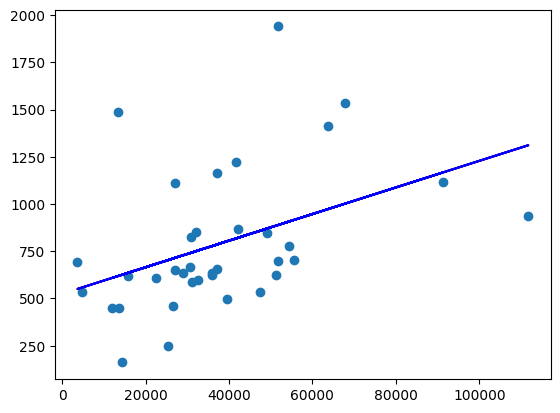

In [131]:
## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(ECATraining_xList, ECATraining_yList)

# obtaining the linear regression curve from OLS
plt.plot(ECATraining_xList, ECATraining_yhatList_OLS, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(ECATraining_xList, ECATraining_yhatList_GD, color = 'blue')
print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# plt.show

Testing Dataset - Europe and Central Asia

According to the Gradient Descent methodology, the optimum coefficient is 0.0070419925358448975. 
However, due to extremely small sample size, the coefficient is not accurate. 
Therefore, although the direction of the line is correctly predicted, the line in testing dataset is not a good fit.


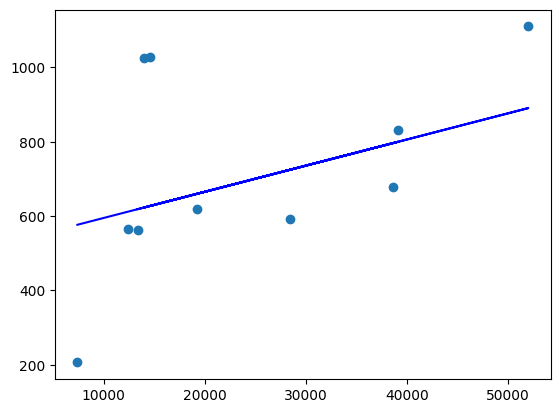

In [132]:
# create two lists of x and y coordinates from testing dataset
# original lists
ECATesting_xList, ECATesting_yList = create_xyLists(ECATesting_Dataset)

# find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
ECATesting_yhatList_GD = []
for x in ECATesting_xList:
    ECATesting_yhatList_GD.append(ECATrainingConstant + (ECATrainingSlope * x))

## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(ECATesting_xList, ECATesting_yList)

# obtaining the linear regression curve from gradient descent
plt.plot(ECATesting_xList, ECATesting_yhatList_GD, color = 'blue')

print(f"According to the Gradient Descent methodology, the optimum coefficient is {ECATrainingSlope}. \n"
      "However, due to extremely small sample size, the coefficient is not accurate. \n"
      "Therefore, although the direction of the line is correctly predicted, the line in testing dataset is not a good fit.") 

Middle East and North Africa Region

In [133]:
# Region == 'Middle East and North Africa'
MENA_df = merged_df[merged_df['Region'] == 'Middle East and North Africa']

# create dataset with x and y coordinates
MENA_xyDataset = list(zip(MENA_df['GDP'], MENA_df['Precipitation']))

# split the dataset into training and testing datasets
MENATraining_Dataset, MENATesting_Dataset = split_data(MENA_xyDataset, 80)
print(MENATraining_Dataset)
print(MENATesting_Dataset)

[(89019.07, 74.0), (9184.0, 111.0), (13791.27, 661.0), (10040.14, 207.0), (43922.63, 121.0), (8848.12, 216.0), (14432.36, 228.0), (15621.0, 56.0), (11989.6, 18.1), (7546.0, 346.0), (5402.54, 402.0), (33098.21, 125.0), (39680.67, 435.0), (10844.77, 89.0), (4753.89, 220.0)]
[(47994.41, 83.0), (41012.97, 560.0), (44770.91, 59.0), (67668.29, 78.0)]


Training Dataset - Middle East and North Africa

In [134]:
# create two lists of x and y coordinates from training dataset
# original lists
MENATraining_xList, MENATraining_yList = create_xyLists(MENATraining_Dataset)

# # normalize SAsia_xList and SAsia_yList to [0, 1] range
# # calculations using large values give OverflowError indicating that it exceeded the range of its datatype (int/float)
# normalized_SAsia_xList = normalized_list(SAsiaTraining_xList)
# normalised_SAsia_yList = normalized_list(SAsiaTraining_yList)

print(MENATraining_xList)
print(MENATraining_yList)

[89019.07, 9184.0, 13791.27, 10040.14, 43922.63, 8848.12, 14432.36, 15621.0, 11989.6, 7546.0, 5402.54, 33098.21, 39680.67, 10844.77, 4753.89]
[74.0, 111.0, 661.0, 207.0, 121.0, 216.0, 228.0, 56.0, 18.1, 346.0, 402.0, 125.0, 435.0, 89.0, 220.0]


In [135]:
## using OLS to validate the best fitted line 

# y_hat = beta0 + (beta1 * x)
MENATraining_yhatList_OLS = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in list(zip(MENATraining_xList, MENATraining_yList)):
    MENATraining_yhatList_OLS.append(find_beta0(MENATraining_xList, MENATraining_yList) + (find_beta1(MENATraining_xList, MENATraining_yList) * x))

print(MENATraining_xList)
print(MENATraining_yhatList_OLS)

[89019.07, 9184.0, 13791.27, 10040.14, 43922.63, 8848.12, 14432.36, 15621.0, 11989.6, 7546.0, 5402.54, 33098.21, 39680.67, 10844.77, 4753.89]
[109.1454130835196, 240.37755231945928, 232.80416510833052, 238.97023741780694, 183.2745181638458, 240.9296687130012, 231.75034737957088, 229.79647209667317, 235.76573335518265, 243.07008135548904, 246.59348079844898, 201.06759822989062, 190.2474122234776, 237.64759417100558, 247.659725584298]


In [136]:
## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.00055555555
alphaOfBeta1 = 0.00000000009
maxIter = 30000

# find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
MENATraining_yhatList_GD, MENATrainingConstant, MENATrainingSlope = findYcoordinatesFromGradientDescent(MENATraining_xList, MENATraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
print(MENATraining_xList)
print(MENATraining_yhatList_GD)
print(f"training constant {MENATrainingConstant}")
print(f"training slope: {MENATrainingSlope}")

In Gradient Descent:-
1. The mean squared error is: 27182.787016870738
2. The final value of beta 0 is: 255.47410875925755
3. The final value of beta 1 is: -0.0016437902360596976
[89019.07, 9184.0, 13791.27, 10040.14, 43922.63, 8848.12, 14432.36, 15621.0, 11989.6, 7546.0, 5402.54, 33098.21, 39680.67, 10844.77, 4753.89]
[109.14543067014279, 240.37753923128528, 232.8041537903945, 238.97022465858512, 183.2745184231948, 240.929655495773, 231.750336307959, 229.796461481769, 235.7657213449962, 243.07006763795107, 246.5934662573356, 201.0675943302041, 190.2474108529506, 237.64758172094443, 247.6597107939557]
training constant 255.47410875925755
training slope: -0.0016437902360596976


In [137]:
# calculating t-value
MENAt_value = calT_value(MENATraining_yhatList_GD, MENATraining_yList, MENATraining_xList, MENATrainingSlope)

In [138]:
# append the data relating to region, coefficient, and t-value to a list
regions_coefficients_t_value.append(['Middle East and North Africa', MENATrainingSlope, MENAt_value])

As you can see the blue line (GD) is almost superseeding the red line (OLS)


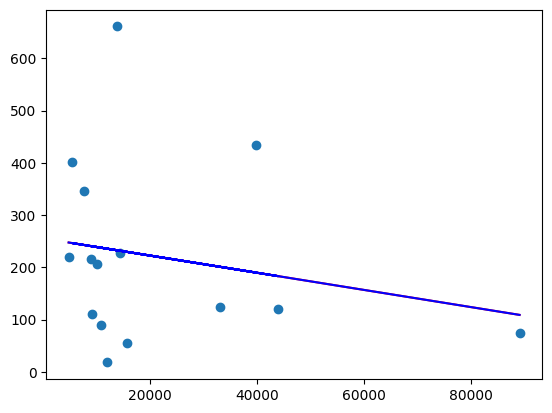

In [139]:
## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(MENATraining_xList, MENATraining_yList)

# obtaining the linear regression curve from OLS
plt.plot(MENATraining_xList, MENATraining_yhatList_OLS, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(MENATraining_xList, MENATraining_yhatList_GD, color = 'blue')
print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# plt.show

Testing Dataset - Middle East and North Africa

According to the Gradient Descent methodology, the optimum coefficient is -0.0016437902360596976. 
However, due to extremely small sample size, the coefficient is not accurate. 
Therefore the line in testing dataset is not a good fit.


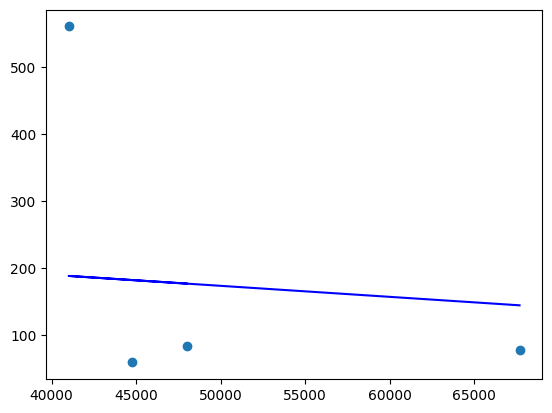

In [140]:
# create two lists of x and y coordinates from testing dataset
# original lists
MENATesting_xList, MENATesting_yList = create_xyLists(MENATesting_Dataset)

# find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
MENATesting_yhatList_GD = []
for x in MENATesting_xList:
    MENATesting_yhatList_GD.append(MENATrainingConstant + (MENATrainingSlope * x))

## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(MENATesting_xList, MENATesting_yList)

# obtaining the linear regression curve from gradient descent
plt.plot(MENATesting_xList, MENATesting_yhatList_GD, color = 'blue')

print(f"According to the Gradient Descent methodology, the optimum coefficient is {MENATrainingSlope}. \n"
      "However, due to extremely small sample size, the coefficient is not accurate. \n"
      "Therefore the line in testing dataset is not a good fit.") 

Sub-Saharan Africa Region

In [141]:
# Region == 'Sub-Saharan Africa'
SSA_df = merged_df[merged_df['Region'] == 'Sub-Saharan Africa']

# create dataset with x and y coordinates
SSA_xyDataset = list(zip(SSA_df['GDP'], SSA_df['Precipitation']))

# split the dataset into training and testing datasets
SSATraining_Dataset, SSATesting_Dataset = split_data(SSA_xyDataset, 80)
print(SSATraining_Dataset)
print(SSATesting_Dataset)

[(1436.21, 1513.0), (2240.49, 1180.0), (12815.91, 495.0), (5092.16, 1348.0), (3186.49, 1039.0), (2064.14, 1168.0), (1044.07, 1543.0), (2093.73, 748.0), (3384.44, 686.0), (6029.69, 1010.0), (4497.36, 630.0), (1990.32, 657.0), (1489.6, 1181.0), (711.36, 1274.0), (3222.37, 900.0), (3665.51, 1604.0), (13545.22, 416.0), (2604.12, 1651.0), (2253.24, 848.0), (6228.43, 228.0), (1383.83, 2391.0), (2123.83, 282.0), (5314.85, 92.0), (1233.42, 1032.0), (3384.65, 1646.0), (1127.42, 282.0), (15132.38, 2156.0), (4058.67, 3200.0), (20219.81, 2041.0), (5263.53, 1187.0), (9041.77, 285.0), (1489.19, 322.0), (2066.63, 1212.0), (847.77, 1343.0), (3183.65, 1020.0), (1586.35, 2526.0)]
[(8290.41, 788.0), (13903.29, 1831.0), (2042.62, 836.0), (1803.63, 1577.0), (2285.08, 788.0), (1214.55, 151.0), (4865.09, 1150.0), (26439.12, 2330.0), (3874.8, 250.0), (2551.51, 1071.0)]


Training Dataset - Sub-Saharan Africa

In [142]:
# create two lists of x and y coordinates from training dataset
# original lists
SSATraining_xList, SSATraining_yList = create_xyLists(SSATraining_Dataset)

# # normalize SAsia_xList and SAsia_yList to [0, 1] range
# # calculations using large values give OverflowError indicating that it exceeded the range of its datatype (int/float)
# normalized_SAsia_xList = normalized_list(SAsiaTraining_xList)
# normalised_SAsia_yList = normalized_list(SAsiaTraining_yList)

print(SSATraining_xList)
print(SSATraining_yList)

[1436.21, 2240.49, 12815.91, 5092.16, 3186.49, 2064.14, 1044.07, 2093.73, 3384.44, 6029.69, 4497.36, 1990.32, 1489.6, 711.36, 3222.37, 3665.51, 13545.22, 2604.12, 2253.24, 6228.43, 1383.83, 2123.83, 5314.85, 1233.42, 3384.65, 1127.42, 15132.38, 4058.67, 20219.81, 5263.53, 9041.77, 1489.19, 2066.63, 847.77, 3183.65, 1586.35]
[1513.0, 1180.0, 495.0, 1348.0, 1039.0, 1168.0, 1543.0, 748.0, 686.0, 1010.0, 630.0, 657.0, 1181.0, 1274.0, 900.0, 1604.0, 416.0, 1651.0, 848.0, 228.0, 2391.0, 282.0, 92.0, 1032.0, 1646.0, 282.0, 2156.0, 3200.0, 2041.0, 1187.0, 285.0, 322.0, 1212.0, 1343.0, 1020.0, 2526.0]


In [143]:
## using OLS to validate the best fitted line 

# y_hat = beta0 + (beta1 * x)
SSATraining_yhatList_OLS = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in list(zip(SSATraining_xList, SSATraining_yList)):
    SSATraining_yhatList_OLS.append(find_beta0(SSATraining_xList, SSATraining_yList) + (find_beta1(SSATraining_xList, SSATraining_yList) * x))

print(SSATraining_xList)
print(SSATraining_yhatList_OLS)


[1436.21, 2240.49, 12815.91, 5092.16, 3186.49, 2064.14, 1044.07, 2093.73, 3384.44, 6029.69, 4497.36, 1990.32, 1489.6, 711.36, 3222.37, 3665.51, 13545.22, 2604.12, 2253.24, 6228.43, 1383.83, 2123.83, 5314.85, 1233.42, 3384.65, 1127.42, 15132.38, 4058.67, 20219.81, 5263.53, 9041.77, 1489.19, 2066.63, 847.77, 3183.65, 1586.35]
[1128.5215730747673, 1132.4092034944754, 1183.5273768833308, 1146.193257603702, 1136.9818627388229, 1131.5567844059547, 1126.6260946433947, 1131.6998129334813, 1137.9386892688638, 1150.7249755966757, 1143.318186019624, 1131.1999623072043, 1128.77964313508, 1125.0178816865377, 1137.1552951000144, 1139.2972911016425, 1187.0526264747632, 1134.1668737703972, 1132.4708328870393, 1151.6856207322164, 1128.2683850290814, 1131.8453066367106, 1147.269669323706, 1127.5413515439416, 1137.9397043412118, 1127.0289816920379, 1194.7244466082288, 1141.1976998844202, 1219.3154443032297, 1147.021604976539, 1165.2843999695237, 1128.7776613271621, 1131.5688202637964, 1125.6772436818035,

In [144]:
## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.00055555555
alphaOfBeta1 = 0.00000000009
maxIter = 30000

# find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
SSATraining_yhatList_GD, SSATrainingConstant, SSATrainingSlope = findYcoordinatesFromGradientDescent(SSATraining_xList, SSATraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
print(SSATraining_xList)
print(SSATraining_yhatList_GD)
print(f"training constant {SSATrainingConstant}")
print(f"training slope: {SSATrainingSlope}")

In Gradient Descent:-
1. The mean squared error is: 486025.2829337726
2. The final value of beta 0 is: 1121.5790755998012
3. The final value of beta 1 is: 0.004833717242663583
[1436.21, 2240.49, 12815.91, 5092.16, 3186.49, 2064.14, 1044.07, 2093.73, 3384.44, 6029.69, 4497.36, 1990.32, 1489.6, 711.36, 3222.37, 3665.51, 13545.22, 2604.12, 2253.24, 6228.43, 1383.83, 2123.83, 5314.85, 1233.42, 3384.65, 1127.42, 15132.38, 4058.67, 20219.81, 5263.53, 9041.77, 1489.19, 2066.63, 847.77, 3183.65, 1586.35]
[1128.5213086408871, 1132.4089707448165, 1183.5275607472258, 1146.193137194203, 1136.9816672563763, 1131.5565447090728, 1126.625814761349, 1131.6995744022831, 1137.9385015845614, 1150.7248921207174, 1143.3180421782668, 1131.1997197022195, 1128.7793808044728, 1125.0175886975424, 1137.155101031043, 1139.297114489957, 1187.0528390694728, 1134.1666553457662, 1132.4706006396605, 1151.6855450855244, 1128.2681185317163, 1131.8450692912875, 1147.2695576869717, 1127.5410791212473, 1137.9395166651825, 1

In [145]:
# calculating t-value
SSAt_value = calT_value(SSATraining_yhatList_GD, SSATraining_yList, SSATraining_xList, SSATrainingSlope)

In [146]:
# append the data relating to region, coefficient, and t-value to a list
regions_coefficients_t_value.append(['Sub-Saharan Africa', SSATrainingSlope, SSAt_value])

As you can see the blue line (GD) is almost superseeding the red line (OLS)


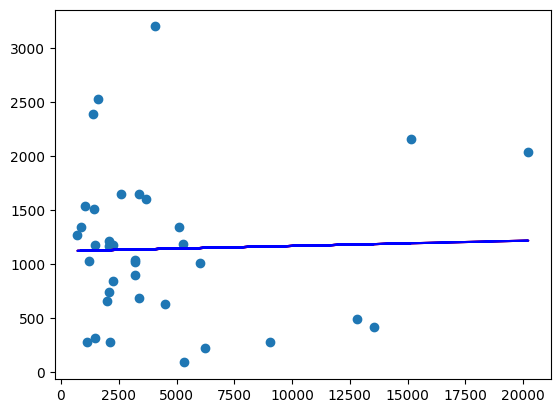

In [147]:
## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(SSATraining_xList, SSATraining_yList)

# obtaining the linear regression curve from OLS
plt.plot(SSATraining_xList, SSATraining_yhatList_OLS, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(SSATraining_xList, SSATraining_yhatList_GD, color = 'blue')
print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# plt.show

Testing Dataset - Sub-Saharan Africa

According to the Gradient Descent methodology, the optimum coefficient is 0.004833717242663583. 
However, due to extremely small sample size, the coefficient is not accurate. 
Therefore the line in testing dataset is not a good fit.


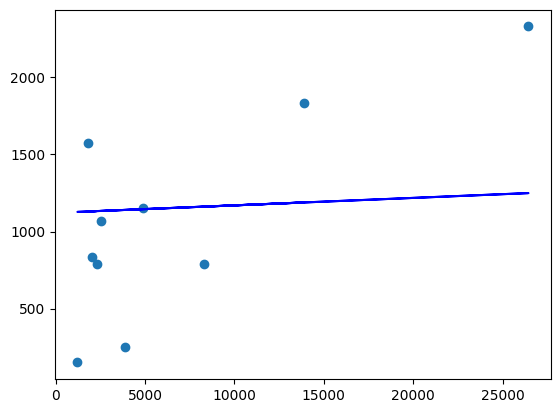

In [148]:
# create two lists of x and y coordinates from testing dataset
# original lists
SSATesting_xList, SSATesting_yList = create_xyLists(SSATesting_Dataset)

# find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
SSATesting_yhatList_GD = []
for x in SSATesting_xList:
    SSATesting_yhatList_GD.append(SSATrainingConstant + (SSATrainingSlope * x))

## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(SSATesting_xList, SSATesting_yList)

# obtaining the linear regression curve from gradient descent
plt.plot(SSATesting_xList, SSATesting_yhatList_GD, color = 'blue')

print(f"According to the Gradient Descent methodology, the optimum coefficient is {SSATrainingSlope}. \n"
      "However, due to extremely small sample size, the coefficient is not accurate. \n"
      "Therefore the line in testing dataset is not a good fit.")

Latin America and Caribbean Region

In [149]:
# Region == 'Sub-Saharan Africa'
LACR_df = merged_df[merged_df['Region'] == 'Latin America and Caribbean']

# create dataset with x and y coordinates
LACR_xyDataset = list(zip(LACR_df['GDP'], LACR_df['Precipitation']))

# split the dataset into training and testing datasets
LACRTraining_Dataset, LACRTesting_Dataset = split_data(LACR_xyDataset, 80)
print(LACRTraining_Dataset)
print(LACRTesting_Dataset)

[(15329.18, 2331.0), (18327.99, 758.0), (22073.37, 1300.0), (8389.11, 1996.0), (19778.39, 2926.0), (14109.76, 1761.0), (10356.97, 2274.0), (13175.52, 2350.0), (9208.37, 2051.0), (13805.78, 1422.0), (10255.76, 2083.0), (5230.56, 2280.0), (18787.56, 1030.0), (16768.43, 1410.0), (11650.93, 2301.0), (23391.32, 2200.0), (13690.97, 1583.0), (25780.41, 1292.0), (18430.57, 2387.0), (5028.15, 1976.0), (19685.22, 591.0), (13317.32, 1130.0), (11187.34, 1738.0), (22970.55, 1522.0), (7703.12, 1705.0)]
[(7679.93, 1146.0), (13358.3, 3240.0), (8295.63, 1784.0), (2970.46, 1440.0), (26606.29, 2928.0), (32437.97, 2054.0), (26701.12, 1427.0)]


Training Dataset - Latin America and Caribbean

In [150]:
# create two lists of x and y coordinates from training dataset
# original lists
LACRTraining_xList, LACRTraining_yList = create_xyLists(LACRTraining_Dataset)

# # normalize SAsia_xList and SAsia_yList to [0, 1] range
# # calculations using large values give OverflowError indicating that it exceeded the range of its datatype (int/float)
# normalized_SAsia_xList = normalized_list(SAsiaTraining_xList)
# normalised_SAsia_yList = normalized_list(SAsiaTraining_yList)

print(LACRTraining_xList)
print(LACRTraining_yList)

[15329.18, 18327.99, 22073.37, 8389.11, 19778.39, 14109.76, 10356.97, 13175.52, 9208.37, 13805.78, 10255.76, 5230.56, 18787.56, 16768.43, 11650.93, 23391.32, 13690.97, 25780.41, 18430.57, 5028.15, 19685.22, 13317.32, 11187.34, 22970.55, 7703.12]
[2331.0, 758.0, 1300.0, 1996.0, 2926.0, 1761.0, 2274.0, 2350.0, 2051.0, 1422.0, 2083.0, 2280.0, 1030.0, 1410.0, 2301.0, 2200.0, 1583.0, 1292.0, 2387.0, 1976.0, 591.0, 1130.0, 1738.0, 1522.0, 1705.0]


In [151]:
## using OLS to validate the best fitted line 

# y_hat = beta0 + (beta1 * x)
LACRTraining_yhatList_OLS = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in list(zip(LACRTraining_xList, LACRTraining_yList)):
    LACRTraining_yhatList_OLS.append(find_beta0(LACRTraining_xList, LACRTraining_yList) + (find_beta1(LACRTraining_xList, LACRTraining_yList) * x))

print(LACRTraining_xList)
print(LACRTraining_yhatList_OLS)

[15329.18, 18327.99, 22073.37, 8389.11, 19778.39, 14109.76, 10356.97, 13175.52, 9208.37, 13805.78, 10255.76, 5230.56, 18787.56, 16768.43, 11650.93, 23391.32, 13690.97, 25780.41, 18430.57, 5028.15, 19685.22, 13317.32, 11187.34, 22970.55, 7703.12]
[1756.531329074244, 1658.49866019731, 1536.0602271661105, 1983.405850732083, 1611.0843248645929, 1796.3948072812366, 1919.075477091818, 1826.9356019869988, 1956.6238124221811, 1806.332072624893, 1922.3840849786245, 2086.6605038382286, 1643.4750762971053, 1709.4814930789234, 1876.7752472606523, 1492.9757516753807, 1810.0852716317527, 1414.8751488071782, 1655.145266293263, 2093.2773927066064, 1614.1301009421918, 1822.300085749975, 1891.930247065461, 1506.730943262493, 2005.8312229707003]


In [152]:
## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.00055555555
alphaOfBeta1 = 0.00000000009
maxIter = 30000

# find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
LACRTraining_yhatList_GD, LACRTrainingConstant, LACRTrainingSlope = findYcoordinatesFromGradientDescent(LACRTraining_xList, LACRTraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
print(LACRTraining_xList)
print(LACRTraining_yhatList_GD)
print(f"training constant {LACRTrainingConstant}")
print(f"training slope: {LACRTrainingSlope}")

In Gradient Descent:-
1. The mean squared error is: 278166.3001214485
2. The final value of beta 0 is: 2216.6999606832974
3. The final value of beta 1 is: -0.030257201872760573
[15329.18, 18327.99, 22073.37, 8389.11, 19778.39, 14109.76, 10356.97, 13175.52, 9208.37, 13805.78, 10255.76, 5230.56, 18787.56, 16768.43, 11650.93, 23391.32, 13690.97, 25780.41, 18430.57, 5028.15, 19685.22, 13317.32, 11187.34, 22970.55, 7703.12]
[1752.8818668794133, 1662.1462673313604, 1548.8215485811602, 1962.8689658805029, 1618.2612217351084, 1789.7781039870952, 1903.3270286031723, 1818.045592264703, 1938.0804506742252, 1798.975688212377, 1906.3893600047145, 2058.4378508557106, 1648.2409650666957, 1709.334189084043, 1864.175419667895, 1508.9440693729555, 1802.4495175593886, 1436.6568909507619, 1659.0424835632525, 2064.562211086776, 1621.0802852335935, 1813.7551210391455, 1878.202355884088, 1521.675392204957, 1983.625103793198]
training constant 2216.6999606832974
training slope: -0.030257201872760573


In [153]:
# calculating t-value
LACRt_value = calT_value(LACRTraining_yhatList_GD, LACRTraining_yList, LACRTraining_xList, LACRTrainingSlope)

In [154]:
# append the data relating to region, coefficient, and t-value to a list
regions_coefficients_t_value.append(['Latin America and Caribbean', LACRTrainingSlope, LACRt_value])

As you can see the blue line (GD) is almost superseeding the red line (OLS)


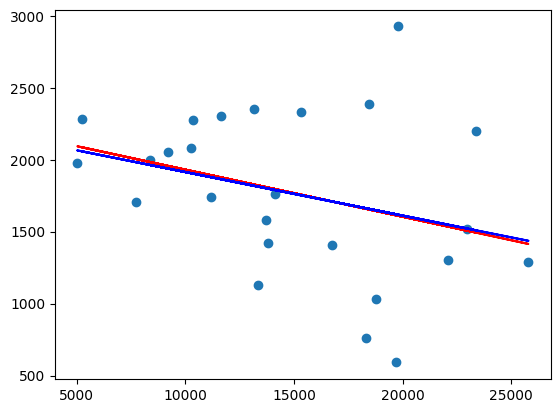

In [155]:
## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(LACRTraining_xList, LACRTraining_yList)

# obtaining the linear regression curve from OLS
plt.plot(LACRTraining_xList, LACRTraining_yhatList_OLS, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(LACRTraining_xList, LACRTraining_yhatList_GD, color = 'blue')
print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# plt.show

Testing Dataset - Latin America and Caribbean

According to the Gradient Descent methodology, the optimum coefficient is -0.030257201872760573. 
However, due to extremely small sample size, the coefficient is not accurate. 
Therefore, although the direction of the line is correctly predicted, the line in testing dataset is not a good fit.


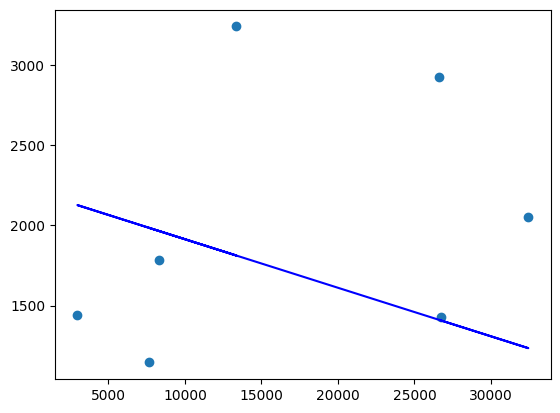

In [156]:
# create two lists of x and y coordinates from testing dataset
# original lists
LACRTesting_xList, LACRTesting_yList = create_xyLists(LACRTesting_Dataset)

# find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
LACRTesting_yhatList_GD = []
for x in LACRTesting_xList:
    LACRTesting_yhatList_GD.append(LACRTrainingConstant + (LACRTrainingSlope * x))

## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(LACRTesting_xList, LACRTesting_yList)

# obtaining the linear regression curve from gradient descent
plt.plot(LACRTesting_xList, LACRTesting_yhatList_GD, color = 'blue')

print(f"According to the Gradient Descent methodology, the optimum coefficient is {LACRTrainingSlope}. \n"
      "However, due to extremely small sample size, the coefficient is not accurate. \n"
      "Therefore, although the direction of the line is correctly predicted, the line in testing dataset is not a good fit.")

East Asia and Pacific Region

In [157]:
# Region == 'East Asia and Pacific'
EAP_df = merged_df[merged_df['Region'] == 'East Asia and Pacific']

# create dataset with x and y coordinates
EAP_xyDataset = list(zip(EAP_df['GDP'], EAP_df['Precipitation']))

# split the dataset into training and testing datasets
EAPTraining_Dataset, EAPTesting_Dataset = split_data(EAP_xyDataset, 80)
print(EAPTraining_Dataset)
print(EAPTesting_Dataset)

[(39989.58, 1668.0), (6062.47, 2880.0), (42052.14, 1732.0), (4947.09, 2091.0), (2848.97, 2000.0), (3741.66, 3142.0), (42396.76, 1274.0), (11515.68, 2702.0), (10966.93, 2592.0), (16865.55, 1622.0), (10450.62, 1821.0), (48747.85, 534.0), (25830.97, 2875.0), (61603.55, 2722.0), (7773.26, 2348.0), (11666.78, 241.0), (4276.18, 1904.0)]
[(16296.61, 645.0), (7763.95, 1834.0), (94910.1, 2497.0), (2469.17, 3028.0), (4856.52, 1500.0)]


Training Dataset - East Asia and Pacific

In [158]:
# create two lists of x and y coordinates from training dataset
# original lists
EAPTraining_xList, EAPTraining_yList = create_xyLists(EAPTraining_Dataset)

# # normalize SAsia_xList and SAsia_yList to [0, 1] range
# # calculations using large values give OverflowError indicating that it exceeded the range of its datatype (int/float)
# normalized_SAsia_xList = normalized_list(SAsiaTraining_xList)
# normalised_SAsia_yList = normalized_list(SAsiaTraining_yList)

print(EAPTraining_xList)
print(EAPTraining_yList)

[39989.58, 6062.47, 42052.14, 4947.09, 2848.97, 3741.66, 42396.76, 11515.68, 10966.93, 16865.55, 10450.62, 48747.85, 25830.97, 61603.55, 7773.26, 11666.78, 4276.18]
[1668.0, 2880.0, 1732.0, 2091.0, 2000.0, 3142.0, 1274.0, 2702.0, 2592.0, 1622.0, 1821.0, 534.0, 2875.0, 2722.0, 2348.0, 241.0, 1904.0]


In [159]:
## using OLS to validate the best fitted line 

# y_hat = beta0 + (beta1 * x)
EAPTraining_yhatList_OLS = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in list(zip(EAPTraining_xList, EAPTraining_yList)):
    EAPTraining_yhatList_OLS.append(find_beta0(EAPTraining_xList, EAPTraining_yList) + (find_beta1(EAPTraining_xList, EAPTraining_yList) * x))

print(EAPTraining_xList)
print(EAPTraining_yhatList_OLS)

[39989.58, 6062.47, 42052.14, 4947.09, 2848.97, 3741.66, 42396.76, 11515.68, 10966.93, 16865.55, 10450.62, 48747.85, 25830.97, 61603.55, 7773.26, 11666.78, 4276.18]
[1788.8147393952136, 2175.3728063044346, 1765.3143821150243, 2188.081201940526, 2211.9867220789515, 2201.8156075705483, 1761.3878572498572, 2113.2401249163045, 2119.4924623307334, 2052.2848768737913, 2125.375185484161, 1689.0249276290765, 1950.1348433392736, 1542.5498951030268, 2155.8804394247436, 2111.518524582236, 2195.725403662101]


In [160]:
## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.00055555555
alphaOfBeta1 = 0.00000000009
maxIter = 30000

# find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
EAPTraining_yhatList_GD, EAPTrainingConstant, EAPTrainingSlope = findYcoordinatesFromGradientDescent(EAPTraining_xList, EAPTraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
print(EAPTraining_xList)
print(EAPTraining_yhatList_GD)
print(f"training constant {EAPTrainingConstant}")
print(f"training slope: {EAPTrainingSlope}")

In Gradient Descent:-
1. The mean squared error is: 572774.532238128
2. The final value of beta 0 is: 2244.4461040296123
3. The final value of beta 1 is: -0.01139374959122997
[39989.58, 6062.47, 42052.14, 4947.09, 2848.97, 3741.66, 42396.76, 11515.68, 10966.93, 16865.55, 10450.62, 48747.85, 25830.97, 61603.55, 7773.26, 11666.78, 4276.18]
[1788.8148432511541, 2175.3718389452683, 1765.3145510942668, 2188.0801993643345, 2211.985653256686, 2201.8145669340906, 1761.3880371101372, 2113.239329736877, 2119.4916498250645, 2052.284250611244, 2125.3743566765124, 1689.0253080187726, 1950.1345001510388, 1542.5506813987972, 2155.879526082088, 2111.5177341736426, 2195.7243799025864]
training constant 2244.4461040296123
training slope: -0.01139374959122997


In [161]:
# calculating t-value
EAPt_value = calT_value(EAPTraining_yhatList_GD, EAPTraining_yList, EAPTraining_xList, EAPTrainingSlope)

In [162]:
# append the data relating to region, coefficient, and t-value to a list
regions_coefficients_t_value.append(['East Asia and Pacific', EAPTrainingSlope, EAPt_value])

As you can see the blue line (GD) is almost superseeding the red line (OLS)


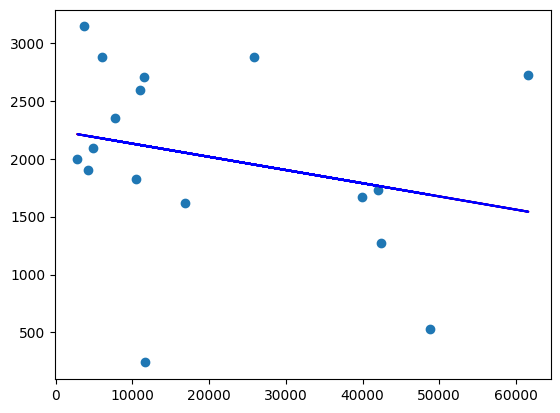

In [163]:
## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(EAPTraining_xList, EAPTraining_yList)

# obtaining the linear regression curve from OLS
plt.plot(EAPTraining_xList, EAPTraining_yhatList_OLS, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(EAPTraining_xList, EAPTraining_yhatList_GD, color = 'blue')
print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# plt.show

Testing Dataset - East Asia and Pacific

According to the Gradient Descent methodology, the optimum coefficient is -0.01139374959122997. 
However, due to extremely small sample size, the coefficient is not accurate. 
Therefore the line in testing dataset is not a good fit.


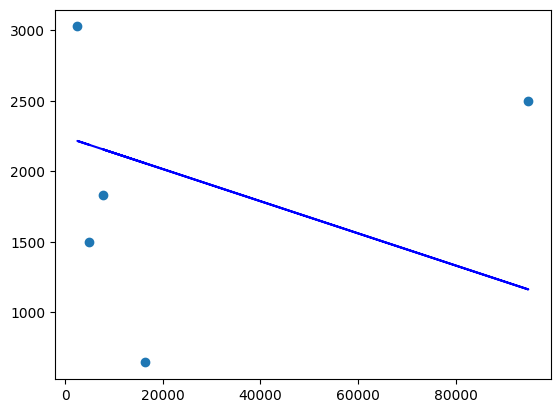

In [164]:

# create two lists of x and y coordinates from testing dataset
# original lists
EAPTesting_xList, EAPTesting_yList = create_xyLists(EAPTesting_Dataset)

# find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
EAPTesting_yhatList_GD = []
for x in EAPTesting_xList:
    EAPTesting_yhatList_GD.append(EAPTrainingConstant + (EAPTrainingSlope * x))

## mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(EAPTesting_xList, EAPTesting_yList)

# obtaining the linear regression curve from gradient descent
plt.plot(EAPTesting_xList, EAPTesting_yhatList_GD, color = 'blue')

print(f"According to the Gradient Descent methodology, the optimum coefficient is {EAPTrainingSlope}. \n"
      "However, due to extremely small sample size, the coefficient is not accurate. \n"
      "Therefore the line in testing dataset is not a good fit.") 

North America Region

In [165]:
# Region == 'East Asia and Pacific'
northAmerica_df = merged_df[merged_df['Region'] == 'North America']

# create dataset with x and y coordinates
northAmerica_xyDataset = list(zip(northAmerica_df['GDP'], northAmerica_df['Precipitation']))

# split the dataset into training and testing datasets
northAmericaTraining_Dataset, northAmericaTesting_Dataset = split_data(northAmerica_xyDataset, 80)
print(northAmericaTraining_Dataset)
print(northAmericaTesting_Dataset)


[(46181.76, 537.0)]
[(60158.91, 715.0)]


In [166]:
# create two lists of x and y coordinates from training dataset
# original lists
northAmericaTraining_xList, northAmericaTraining_yList = create_xyLists(northAmericaTraining_Dataset)

# # normalize SAsia_xList and SAsia_yList to [0, 1] range
# # calculations using large values give OverflowError indicating that it exceeded the range of its datatype (int/float)
# normalized_SAsia_xList = normalized_list(SAsiaTraining_xList)
# normalised_SAsia_yList = normalized_list(SAsiaTraining_yList)

print(northAmericaTraining_xList)
print(northAmericaTraining_yList)

[46181.76]
[537.0]


In [167]:
# ## using OLS to validate the best fitted line 

# # y_hat = beta0 + (beta1 * x)
# northAmericaTraining_yhatList_OLS = []

# # find a list of y_hat values, using OLS, for every value of x
# for (x,y) in list(zip(northAmericaTraining_xList, northAmericaTraining_yList)):
#     northAmericaTraining_yhatList_OLS.append(find_beta0(northAmericaTraining_xList, northAmericaTraining_yList) + (find_beta1(northAmericaTraining_xList, northAmericaTraining_yList) * x))

# print(northAmericaTraining_xList)
# print(northAmericaTraining_yhatList_OLS)

# ## using gradient descent

# # config of y_hat coordinated in gradient descent
# initialBeta0forGradientDescent = 0
# initialBeta1forGradientDescent = 1
# alphaOfBeta0 = 0.00055555555
# alphaOfBeta1 = 0.00000000009
# maxIter = 30000

# # find yhat coordinates for each x, the constant, and the slope for the training dataset using gradient descent method
# northAmericaTraining_yhatList_GD, northAmericaTrainingConstant, northAmericaTrainingSlope = findYcoordinatesFromGradientDescent(northAmericaTraining_xList, northAmericaTraining_yList, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)
# print(northAmericaTraining_xList)
# print(northAmericaTraining_yhatList_GD)
# print(f"training constant {northAmericaTrainingConstant}")
# print(f"training slope: {northAmericaTrainingSlope}")

In [168]:
# ## mapping graphs

# # plotting the scatter plot of randomized points
# plt.scatter(northAmericaTraining_xList, northAmericaTraining_yList)

# # obtaining the linear regression curve from OLS
# plt.plot(northAmericaTraining_xList, northAmericaTraining_yhatList_OLS, color = 'red')

# # obtaining the linear regression curve from gradient descent
# plt.plot(northAmericaTraining_xList, northAmericaTraining_yhatList_GD, color = 'blue')
# print("As you can see the blue line (GD) is almost superseeding the red line (OLS)")
# # plt.show

Testing Dataset - North America

In [169]:
# # create two lists of x and y coordinates from testing dataset
# # original lists
# northAmericaTesting_xList, northAmericaTesting_yList = create_xyLists(northAmericaTesting_Dataset)

# # find yhat coordinates for each x for the testing dataset using the derived slope and constant from gradient descent algorithm
# northAmericaTesting_yhatList_GD = []
# for x in northAmericaTesting_xList:
#     northAmericaTesting_yhatList_GD.append(northAmericaTrainingConstant + (northAmericaTrainingSlope * x))

# ## mapping graphs

# # plotting the scatter plot of randomized points
# plt.scatter(northAmericaTesting_xList, northAmericaTesting_yList)

# # obtaining the linear regression curve from gradient descent
# plt.plot(northAmericaTesting_xList, northAmericaTesting_yhatList_GD, color = 'blue')

In [170]:
# print(regions_coefficients_t_value)

[['South Asia', 0.0724559234491282, 0.7523861619014942], ['Europe and Central Asia', 0.0070419925358448975, 2.7102383663759855], ['Middle East and North Africa', -0.0016437902360596976, -0.7793653265889792], ['Sub-Saharan Africa', 0.004833717242663583, 0.17791820347135928], ['Latin America and Caribbean', -0.030257201872760573, -1.545602941604653], ['East Asia and Pacific', -0.01139374959122997, -1.0649222602728723]]


In [174]:
# define the headers of the table
headers = ['Region', 'Coefficient', 't-statistic']

# create the table using regions_coefficients_t_value list
print(tabulate(regions_coefficients_t_value, headers=headers))

Region                          Coefficient    t-statistic
----------------------------  -------------  -------------
South Asia                       0.0724559        0.752386
Europe and Central Asia          0.00704199       2.71024
Middle East and North Africa    -0.00164379      -0.779365
Sub-Saharan Africa               0.00483372       0.177918
Latin America and Caribbean     -0.0302572       -1.5456
East Asia and Pacific           -0.0113937       -1.06492
